Step 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows to understand the structure
print("Training Data Head:")
display(train_df.head())

print("\nTest Data Head:")
display(test_df.head())

Training Data Head:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969



Test Data Head:


,Comb,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004P00128942,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN
1,1000009P00113442,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010P00288442,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN
3,1000010P00145342,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN
4,1000011P00053842,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Step 2

In [2]:
# check for data types and missing values
print("Training Data Info:")
print(train_df.info())

# Statistical summary of numerical columns
print("\nStatistical Description:")
display(train_df.describe())

# Check for missing values
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000



Missing Values in Train Data:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


Step 3

In [3]:
# 1. Handle Missing Values
# Fill NaN in Product Categories with 0 (treating as a distinct 'No Category')
train_df['Product_Category_2'] = train_df['Product_Category_2'].fillna(0).astype('int')
train_df['Product_Category_3'] = train_df['Product_Category_3'].fillna(0).astype('int')

test_df['Product_Category_2'] = test_df['Product_Category_2'].fillna(0).astype('int')
test_df['Product_Category_3'] = test_df['Product_Category_3'].fillna(0).astype('int')

# 2. Fix 'Stay_In_Current_City_Years' 
# Replacing '4+' with '4' to make it numerical-friendly
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].replace('4+', '4').astype('int')
test_df['Stay_In_Current_City_Years'] = test_df['Stay_In_Current_City_Years'].replace('4+', '4').astype('int')

# Check if cleaning worked
print("Missing values after cleaning:")
print(train_df.isnull().sum())

Missing values after cleaning:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


Visualization -step 4


C:\Users\vardh\AppData\Local\Temp\ipykernel_42008\678205285.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase', data=train_df, palette='pastel')


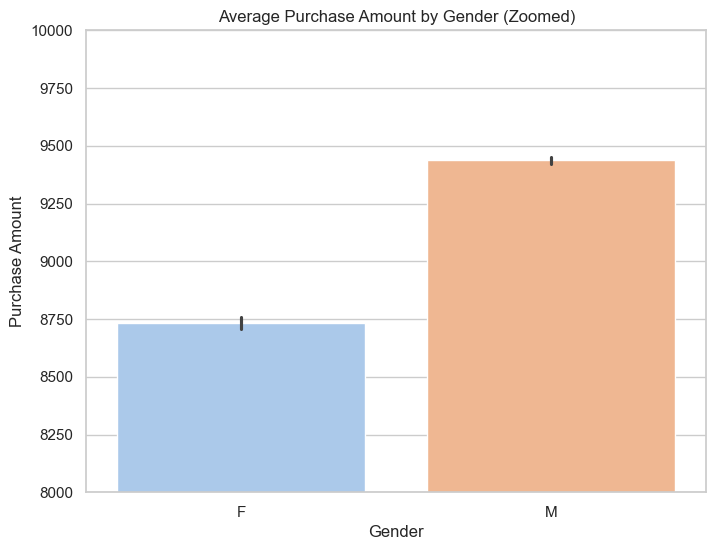

C:\Users\vardh\AppData\Local\Temp\ipykernel_42008\678205285.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=train_df, order=age_order, palette='viridis')


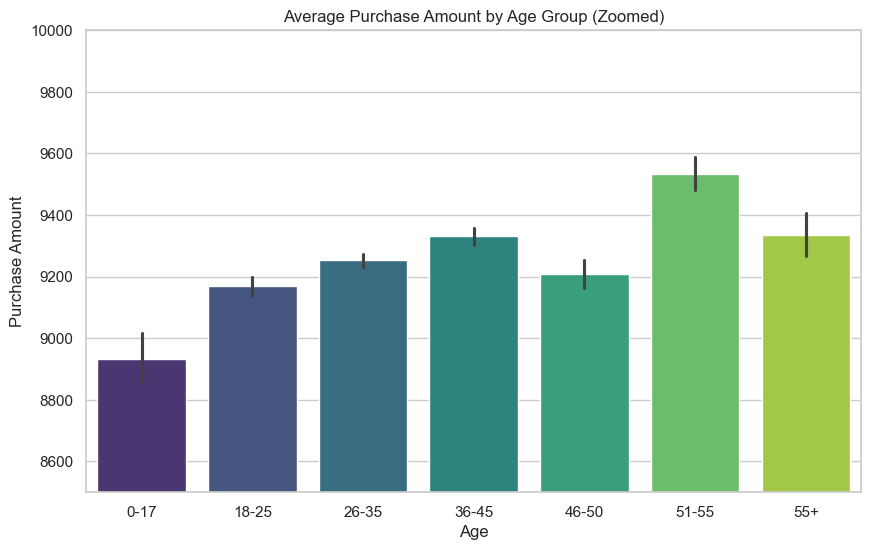

C:\Users\vardh\AppData\Local\Temp\ipykernel_42008\678205285.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City_Category', y='Purchase', data=train_df, palette='muted', order=['A', 'B', 'C'])


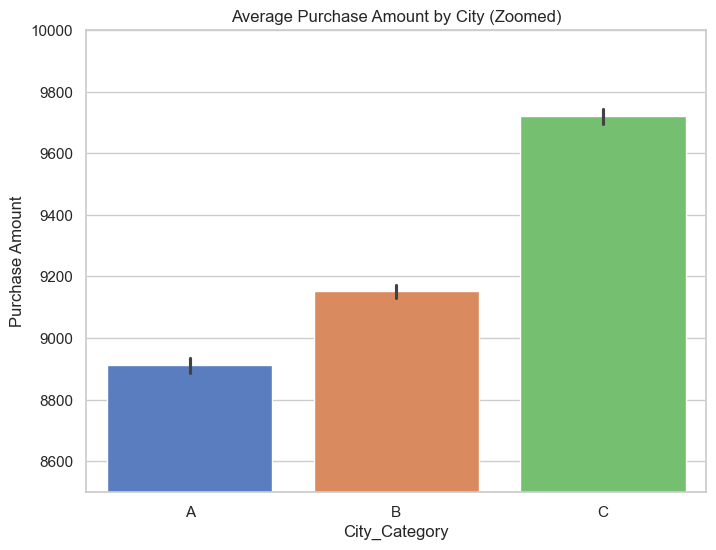

C:\Users\vardh\AppData\Local\Temp\ipykernel_42008\678205285.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category_1', y='Purchase', data=train_df, palette='rocket')


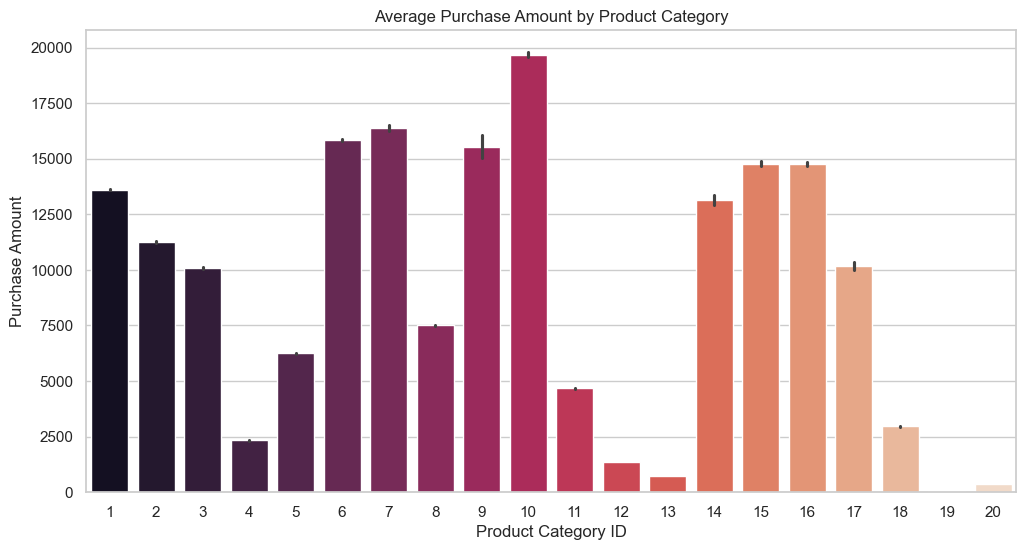

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# --- Chart 1: Purchase by Gender (Zoomed) ---
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=train_df, palette='pastel')
# Zooming in: Focus the Y-axis between 8000 and 10000
plt.ylim(8000, 10000) 
plt.title('Average Purchase Amount by Gender (Zoomed)')
plt.ylabel('Purchase Amount')
plt.show()

# --- Chart 2: Purchase by Age (Zoomed) ---
plt.figure(figsize=(10, 6))
# Define the order for the age groups so the chart is sorted
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.barplot(x='Age', y='Purchase', data=train_df, order=age_order, palette='viridis')
# Zooming in: Focus the Y-axis between 8500 and 10000
plt.ylim(8500, 10000)
plt.title('Average Purchase Amount by Age Group (Zoomed)')
plt.ylabel('Purchase Amount')
plt.show()

# --- Chart 3: Purchase by City Category (Zoomed) ---
plt.figure(figsize=(8, 6))
sns.barplot(x='City_Category', y='Purchase', data=train_df, palette='muted', order=['A', 'B', 'C'])
# Zooming in: Focus the Y-axis between 8500 and 10000
plt.ylim(8500, 10000)
plt.title('Average Purchase Amount by City (Zoomed)')
plt.ylabel('Purchase Amount')
plt.show()

# --- Chart 4: Purchase by Product Category 1 (Standard) ---
# We usually don't zoom this one because the differences are naturally large
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category_1', y='Purchase', data=train_df, palette='rocket')
plt.title('Average Purchase Amount by Product Category')
plt.ylabel('Purchase Amount')
plt.xlabel('Product Category ID')
plt.show()

Step 5


Step 6

Since our target variable Purchase is a continuous numerical value (amount in dollars/currency), this is a Regression Task.

Proposed Model 1: Linear Regression (Baseline)
Why: It serves as a simple baseline to establish a minimum performance benchmark.

Pros: Fast, interpretable, easy to understand coefficients (e.g., "being Male adds $X to purchase").

Cons: Likely too simple to capture complex interactions (e.g., "Young Men in City A" might behave differently than "Old Men in City A").

Prediction 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- 3. Encoding Categorical Variables ---
# We use LabelEncoder to convert text (Gender, Age, City) into numbers.
le = LabelEncoder()
cols_to_encode = ['Gender', 'Age', 'City_Category']

for col in cols_to_encode:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])

# --- 4. Feature Selection ---
# Define Features (X) and Target (y)
X = train_df.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = train_df['Purchase']

# Prepare the Test Data for final prediction
X_test_submission = test_df.drop(['User_ID', 'Product_ID', 'Comb'], axis=1)

# --- 5. Model Training ---
# Split data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# --- 6. Evaluation ---
# Predict on the validation set
y_pred = lr_model.predict(X_val)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("Linear Regression Performance:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# --- 7. Interpreting Coefficients (Why Linear Regression is useful) ---
# Create a dataframe to see the impact of each feature
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients (Impact on Purchase):")
display(coef_df)

# --- 8. Final Prediction & Submission ---
# Predict on the actual test.csv data
final_predictions = lr_model.predict(X_test_submission)

# Create the submission file
submission = pd.DataFrame({
    'User_ID': test_df['User_ID'],
    'Product_ID': test_df['Product_ID'],
    'Purchase': final_predictions
})

# Save to CSV
submission.to_csv('submission_linear_regression.csv', index=False)
print("\nSuccess! Predictions saved to 'submission_linear_regression.csv'")

Linear Regression Performance:
RMSE (Root Mean Squared Error): 4618.70
R2 Score: 0.1510

Feature Coefficients (Impact on Purchase):


,Feature,Coefficient
0,Gender,475.376430
3,City_Category,314.487034
8,Product_Category_3,144.067245
1,Age,105.000915
7,Product_Category_2,13.002048
4,Stay_In_Current_City_Years,7.898929
2,Occupation,5.371856
5,Marital_Status,-50.044430
6,Product_Category_1,-348.364793



Success! Predictions saved to 'submission_linear_regression.csv'
